# Data preprocess

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import plot_confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from __future__ import division
from __future__ import print_function
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import os
from PIL import Image
import numpy as np
from scipy import misc
import random
import shutil
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense, Flatten, Flatten, BatchNormalization, Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from sklearn.metrics import confusion_matrix
import warnings 
warnings.simplefilter(action = 'ignore',category = FutureWarning)
%matplotlib inline 
import tensorflow
import cv2 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from numpy.random import seed
seed(13)
#from tensorflow import set_random_seed
#set_random_seed(2)

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_gen = ImageDataGenerator(rotation_range=23, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# set up CNN model


In [4]:


#model 4   98.6%.  71s 6s/step - loss: 0.4466 - accuracy: 0.7770 - val_loss: 0.3815 - val_accuracy: 0.8243
model = Sequential()
image_shape = (1000,1000,3)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


'''
#model 3        69s 6s/step - loss: 0.3948 - accuracy: 0.8041 - val_loss: 0.3418 - val_accuracy: 0.8581
#accuracy is 1.0
#f1 score is 1.0
model = Sequential()
image_shape = (1000,1000,3)
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer = Adam(learning_rate = 0.0001),loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
'''

'''
#model2      674s 6s/step - loss: 0.7063 - accuracy: 0.8243 - val_loss: 0.3134 - val_accuracy: 0.8784
#accuracy is 0.975
#f1 score is 0.9743589743589743

model = Sequential()
image_shape = (1000,1000,3)
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = Adam(learning_rate = 0.0001),loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


'''
'''

#model1.    

#accuracy is 0.825
#f1 score is 0.8
model = Sequential()
image_shape = (1000,1000,3)
model.add(Conv2D(filters=6, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


'''
'''
#model5.      0%     loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
model = Sequential()
image_shape = (1000,1000,3)
model.add(Conv2D(filters=6, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('relu'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 998, 998, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 499, 499, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 497, 497, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 248, 248, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 246, 246, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 123, 123, 64)     0

"\n#model5.      0%     loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000\nmodel = Sequential()\nimage_shape = (1000,1000,3)\nmodel.add(Conv2D(filters=6, kernel_size=(3,3),input_shape=image_shape, activation='relu',))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(1))\nmodel.add(Activation('relu'))\nmodel.compile(loss='binary_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\nmodel.summary()\n"

In [5]:
batch_size = 13
train='/content/drive/My Drive/CNN_final project/xray/train'
train_set = image_gen.flow_from_directory(train,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

valid='/content/drive/My Drive/CNN_final project/xray/valid'
valid_set = image_gen.flow_from_directory(train,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')


test='/content/drive/My Drive/CNN_final project/xray/test'
test_set = image_gen.flow_from_directory(test,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                              class_mode='binary',shuffle=False)


Found 148 images belonging to 2 classes.
Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss',patience=2)

In [7]:
results = model.fit(train_set,epochs=13,
                              validation_data=valid_set,callbacks=[stop])

Epoch 1/13
12/12 [==============================] - 149s 12s/step - loss: 4.9689 - accuracy: 0.5000 - val_loss: 0.8060 - val_accuracy: 0.5000
Epoch 2/13
12/12 [==============================] - 70s 6s/step - loss: 0.7198 - accuracy: 0.5811 - val_loss: 0.5206 - val_accuracy: 0.8311
Epoch 3/13
12/12 [==============================] - 70s 6s/step - loss: 0.6190 - accuracy: 0.6622 - val_loss: 0.5101 - val_accuracy: 0.8378
Epoch 4/13
12/12 [==============================] - 71s 6s/step - loss: 0.5167 - accuracy: 0.7297 - val_loss: 0.3870 - val_accuracy: 0.8716
Epoch 5/13
12/12 [==============================] - 70s 6s/step - loss: 0.5682 - accuracy: 0.6892 - val_loss: 0.4562 - val_accuracy: 0.8581
Epoch 6/13
12/12 [==============================] - 69s 6s/step - loss: 0.5614 - accuracy: 0.6216 - val_loss: 0.5010 - val_accuracy: 0.8919


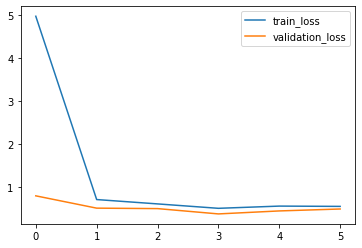

In [8]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train_loss','validation_loss'],loc='upper right')

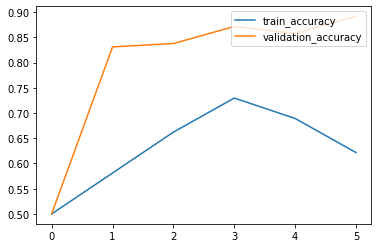

In [9]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['train_accuracy','validation_accuracy'],loc='upper right')

# Test 

In [10]:
predictions = model.predict(x=test_set, verbose = 0 )  
predictions


array([[0.26274887],
       [0.37736884],
       [0.30375165],
       [0.35570022],
       [0.42268455],
       [0.44984004],
       [0.3130298 ],
       [0.29355478],
       [0.30407026],
       [0.31396466],
       [0.35734725],
       [0.2946832 ],
       [0.40370023],
       [0.26420295],
       [0.3487903 ],
       [0.30935782],
       [0.34720945],
       [0.24407148],
       [0.28562865],
       [0.40032414],
       [0.63714325],
       [0.73026323],
       [0.6347198 ],
       [0.5777601 ],
       [0.648047  ],
       [0.62696916],
       [0.74954236],
       [0.8474005 ],
       [0.62591034],
       [0.59933347],
       [0.6232917 ],
       [0.8914758 ],
       [0.7714575 ],
       [0.58025086],
       [0.47197363],
       [0.5140103 ],
       [0.5920984 ],
       [0.4723021 ],
       [0.5477906 ],
       [0.56202054]], dtype=float32)

In [11]:
print(np.round(predictions))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]]


In [12]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:

accuracy = accuracy_score(y_true=test_set.classes, y_pred = predictions.round(), normalize=True, sample_weight=None)
print("accuracy is", accuracy) #???????

f1 = f1_score(test_set.classes, predictions.round())
print("f1 score is", f1)

accuracy is 0.95
f1 score is 0.9473684210526316
